In [50]:
import sqlite3 as lite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
#Connect to database
con = lite.connect('/home/esmee/Documents/DBDM/DDM2017-master/Problemsets/Problemset2/ThirteenDatasets.db')

Set01
MEAN:  54.2660997842 47.8347206249
STD:   16.7106719481 26.8447175728
Set02
MEAN:  54.2687300224 47.8308231552
STD:   16.7100885525 26.8407150122
Set03
MEAN:  54.2673197062 47.8377172672
STD:   16.700894265 26.8350444829
Set04
MEAN:  54.2632732394 47.8322528169
STD:   16.7060055514 26.8403929493
Set05
MEAN:  54.2603034512 47.8398292088
STD:   16.7085898527 26.8351993649
Set06
MEAN:  54.2614417835 47.8302519136
STD:   16.7067587501 26.8448499055
Set07
MEAN:  54.2688052797 47.8354502039
STD:   16.7075620188 26.8449712173
Set08
MEAN:  54.2678488234 47.8358963306
STD:   16.7076167562 26.8410919198
Set09
MEAN:  54.2658817856 47.831495652
STD:   16.7097030942 26.8435862296
Set10
MEAN:  54.2673411045 47.8395452251
STD:   16.709809264 26.8352822411
Set11
MEAN:  54.269927231 47.8369879882
STD:   16.7108051339 26.8426652259
Set12
MEAN:  54.2669163013 47.831601988
STD:   16.7108459958 26.8428825772
Set13
MEAN:  54.260150334 47.8397172792
STD:   16.7108042216 26.8350102034


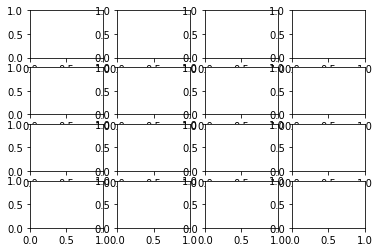

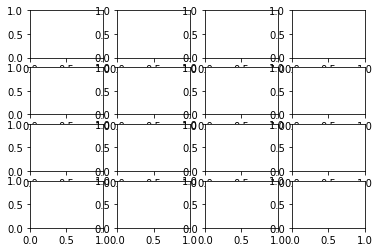

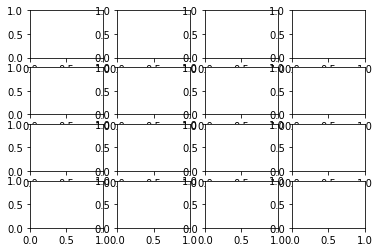

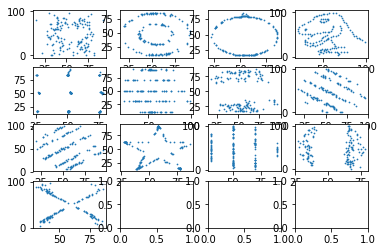

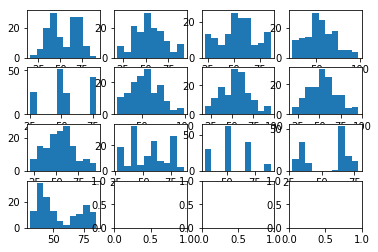

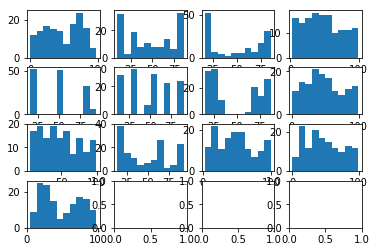

In [70]:
#Read in names of the tables in Database
t = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
#Set up a figure to include in the for loop
fig1, axs1 = plt.subplots(4,4)
axs1 = axs1.ravel()
fig2, axs2 = plt.subplots(4,4)
axs2 = axs2.ravel()
fig3, axs3 = plt.subplots(4,4)
axs3 = axs3.ravel()
tel=0

#Go trough all tables and save the mean 
for table in t['name']:
    data = pd.read_sql_query("SELECT x,y FROM {0}".format(table), con)
    print "{0}".format(table)
    print "MEAN: ", np.mean(data['x']), np.mean(data['y'])
    print "STD:  ", np.std(data['x']), np.std(data['y'])
    axs1[tel].scatter(data['x'],data['y'],0.5)
    axs2[tel].hist(data['x'])
    axs3[tel].hist(data['y'])
    tel = tel+1

plt.show()

In [87]:
"""Problem 3: Basic Use of emcee"""

import emcee 
import cPickle

def pickle_from_file(fname):
    fh = open(fname, 'r')
    data = cPickle.load(fh)
    fh.close()
    return data

def lnL(theta, x, y, yerr): 
    a, b = theta 
    model = b * x + a 
    inv_sigma2 = 1.0/(yerr**2) 
    return -0.5*(np.sum((y-model)**2*inv_sigma2))

def lnprior(theta): 
    a, b = theta 
    if -5.0 < a < 5.0 and -10.0 < b < 10.0: 
        return 0.0 
    return -np.inf

def lnprob(theta, x, y, yerr): 
    """ 
    The likelihood to include in the MCMC. 
    """ 
    lp = lnprior(theta) 
    if not np.isfinite(lp): 
        return -np.inf 
    return lp + lnL(theta, x, y, yerr)

#Open the pickle file containing x,y,y_true and sigma
d = pickle_from_file('points_example1.pkl')

#Set up the properties of the problem
ndim, nwalkers = 2, 100
p_init = np.array([0.28233725, 1.31299656])

#Set up a number of intial positions
pos = [p_init + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

#Create the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(d['x'],d['y_true'],d['sigma']))
sampler.run_mcmc(pos,500)

#Visualise
samples  = sampler.chain.reshape((-1,2))
import corner
fig = corner.corner(samples)
fig.show()

/home/esmee/.local/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
